In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from mpl_toolkits.mplot3d import Axes3D

In [2]:
dataFrame = pd.read_csv("verilerist4.csv")
#Veriyi yükledik.

In [3]:
dataFrame.head()
#İlk 5 satırı gözlemliyoruz.

,Fiyatlar,Metrekare,Yas,Konum,Oda
0,9000,55,20,"Küçükçekmece,Atakent Mahallesi",1 + 1
1,7500,100,4,"Esenyurt,OrhanGazi Mahallesi",2 + 1
2,10000,85,5,"Esenyurt,Koza Mahallesi",2 + 1
3,10000,51,23,"Küçükçekmece,Atakent Mahallesi",1 + 1
4,12000,60,10,"Şişli,Gülbahar Mahallesi",1 + 1


In [4]:
dataFrame.describe()
#Burada sayısal verilerin ortalama,min,max değerlerini görüyoruz.
#Min ve max değerlerin incelenmesi bizim için çok önemli. Absürt değerlerden anlıyoruzki verimiz yanlış
#girdileri de bünyesinde bulunduruyor.

,Fiyatlar,Metrekare,Yas
count,1.184800e+04,11848.000000,11848.000000
mean,8.047342e+04,147.609470,16.515192
std,1.522253e+06,241.982272,15.281421
min,1.000000e+00,3.000000,1.000000
25%,1.400000e+04,80.000000,4.000000
50%,2.000000e+04,110.000000,11.000000
75%,3.912250e+04,155.000000,27.000000
max,1.280000e+08,11000.000000,400.000000


In [5]:
dataFrame.isnull().sum()
#Verimizde boş girdileri inceliyoruz.

Fiyatlar     0
Metrekare    0
Yas          0
Konum        0
Oda          0
dtype: int64

<ipython-input-6-493a329c5718>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["Fiyatlar"])


<Axes: xlabel='Fiyatlar', ylabel='Density'>

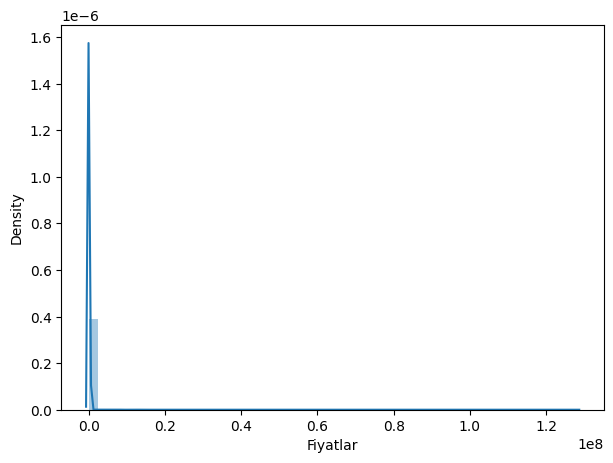

In [6]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["Fiyatlar"])
#Fiyat sütununu görselleştirdiğimizde absürt değerlerin varlığını daha net görebiliyoruz.
#Modelleme yaptıktan sonra sağlıklı skorlar elde edebilmek için bu değerlerden kurtulmamız gerekiyor.

In [9]:
dataFrame.sort_values("Fiyatlar",ascending = False).head(100)
#En yüksekten başlayarak fiyatlar sütununun ilk 100 elemanını gözlemliyoruz.

,Fiyatlar,Metrekare,Yas,Konum,Oda
9145,128000000,550,18,"Sarıyer,Emirgan Mahallesi",6 + 2
8089,60000000,80,40,"Fatih,Şehremini Mahallesi",2 + 1
8529,40000000,150,30,"Bakırköy,Yeşilköy Mahallesi",3 + 1
5827,40000000,180,65,"Beyoğlu,KılıçaliPaşa Mahallesi",3 + 1
4879,35000000,75,11,"Sarıyer,Maslak Mahallesi",1 + 1
...,...,...,...,...,...
11395,320000,220,4,"Beşiktaş,Levazım Mahallesi",2 + 1
10997,315000,430,44,"Sarıyer,Yeniköy Mahallesi",6 + 1
7323,300000,530,16,"Beykoz,Kanlıca Mahallesi",6 + 1
2340,300000,630,30,"Sarıyer,Kireçburnu Mahallesi",5 + 2


In [10]:
dataFrame.sort_values("Fiyatlar",ascending = True).head(100)
#Fazla yüksek girilen veriler olduğu gibi düşük girilen verilerde var.

,Fiyatlar,Metrekare,Yas,Konum,Oda
9224,1,180,15,"Ataşehir,Küçükbakkalköy Mahallesi",3 + 1
6042,1,70,20,"Fatih,Aksaray Mahallesi",1 + 1
982,15,110,32,"Şişli,Duatepe Mahallesi",2 + 1
727,25,110,4,"Şişli,Merkez Mahallesi",2 + 1
4442,25,80,35,"Üsküdar,Kuzguncuk Mahallesi",1 + 1
...,...,...,...,...,...
4431,4000,65,24,"Küçükçekmece,FevziÇakmak Mahallesi",2 + 1
10213,4000,200,10,"Kağıthane,Çeliktepe Mahallesi",1 + 1
7771,4000,145,25,"Beykoz,Çubuklu Mahallesi",4 + 1
7845,4000,25,30,"Şişli,Duatepe Mahallesi",Stüdyo


In [11]:
dataFrame.sort_values("Yas",ascending = False).head(100)
#Yaş sütunu içinde geçerli.

,Fiyatlar,Metrekare,Yas,Konum,Oda
3431,9000,85,400,"Üsküdar,ZeynepKamil Mahallesi",2 + 1
7559,7500,50,201,"Sultangazi,ZübeydeHanım Mahallesi",Stüdyo
11648,75000,190,190,"Şişli,Fulya Mahallesi",2 + 1
5445,240000,380,133,"Adalar,Nizam Mahallesi",5 + 1
8313,35000,90,130,"Beyoğlu,Hacımimi Mahallesi",1 + 1
...,...,...,...,...,...
3104,23000,79,60,"Beyoğlu,Hacımimi Mahallesi",2 + 1
9980,7500,55,60,"Maltepe,Altayçeşme Mahallesi",Stüdyo
4744,27500,125,60,"Beyoğlu,Cihangir Mahallesi",3 + 1
10488,25000,140,60,"Beyoğlu,KılıçaliPaşa Mahallesi",3 + 1


In [12]:
dataFrame.sort_values("Metrekare",ascending = False).head(100)

,Fiyatlar,Metrekare,Yas,Konum,Oda
5223,230000,11000,30,"Kadıköy,Osmanağa Mahallesi",21 + 0
2019,10000,10000,16,"Ümraniye,İnkılap Mahallesi",3 + 1
11622,56000,10000,11,"Beşiktaş,Levent Mahallesi",2 + 1
8125,18000,5686,31,"Fatih,Mevlanakapı Mahallesi",2 + 1
9209,20000,5500,1,"Silivri,Yolçatı Mahallesi",Stüdyo
...,...,...,...,...,...
9007,187000,760,1,"Üsküdar,KüçükÇamlıca Mahallesi",6 + 3
6981,280000,750,10,"Sarıyer,Maslak Mahallesi",5 + 1
9550,200000,750,18,"Sarıyer,Uskumruköy Mahallesi",8 + 2
7974,275000,750,26,"Sarıyer,Kireçburnu Mahallesi",7 + 2


In [13]:
print(len(dataFrame))
len(dataFrame) * 0.01
#Ortalama olarak büyük verilerde %1lik hata oranı normaldir. Dolayısıyla her sütunun en az ve en yüksek
#yüzde birini veriden çıkardığımız zaman doğru verilere ulaşabileceğimizi varsayabiliriz.

11848


118.48

In [14]:
yuzdeDoksanDokuzDf = dataFrame.sort_values("Fiyatlar",ascending = False).iloc[118:]
yuzdeDoksanDokuzDf2 = yuzdeDoksanDokuzDf.sort_values("Fiyatlar",ascending= True).iloc[118:]
son2 = yuzdeDoksanDokuzDf2.sort_values("Metrekare",ascending= True).iloc[118:]
son3 = son2.sort_values("Metrekare",ascending= False).iloc[118:]
dataFrame = son3.sort_values("Yas",ascending= False).iloc[118:]
#Bütün sayısal veri içeren sütunlarımız için bu işlemi gerçekleştirdik. Verimiz yüzde 5lik bir küçülme yaşadı
#ancak artık sağlıklı bir modelleme gerçekleştirebiliriz.

In [15]:
dataFrame.describe()
#Describe ederek min ve max değerleri tekrar inceliyoruz. Eskiye göre çokça absürt değerlerle karşılaşmıyoruz.
#Bu demek oluyorki yeterli ayıklamayı yaptık.

,Fiyatlar,Metrekare,Yas
count,11258.000000,11258.000000,11258.000000
mean,34029.963048,131.614940,15.814798
std,36564.310589,78.947165,13.176557
min,4500.000000,35.000000,1.000000
25%,14000.000000,83.000000,4.000000
50%,20000.000000,110.000000,11.000000
75%,37375.000000,150.000000,26.000000
max,283500.000000,600.000000,55.000000


<ipython-input-16-099f6f2cc404>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["Fiyatlar"])


<Axes: xlabel='Fiyatlar', ylabel='Density'>

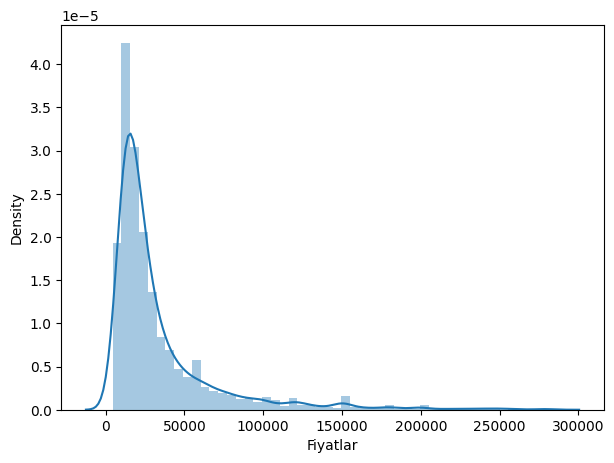

In [16]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["Fiyatlar"])

<ipython-input-19-69edcd003bcb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataFrame.corr()


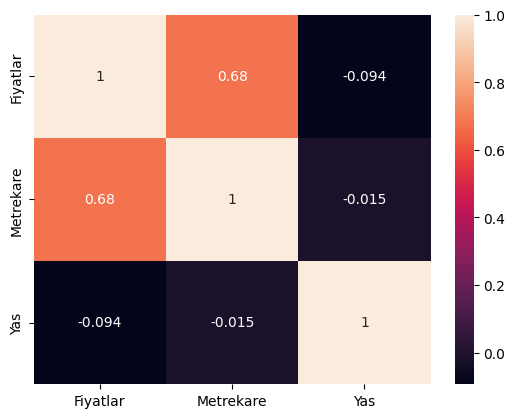

In [19]:
corr_matrix = dataFrame.corr()
sbn.heatmap(corr_matrix, annot=True)
plt.show()
#Korelasyon incelenebilir.

In [20]:
dataFrame = pd.get_dummies(dataFrame, columns=['Konum',"Oda"])
dataFrame.head()
#Verimiz regresyon modellemesine uygun olduğu için kategorik değişkenlerimizi numeric hale getirme
#işlemi yapıyoruz.

,Fiyatlar,Metrekare,Yas,"Konum_Adalar,Burgazada Mahallesi","Konum_Adalar,Heybeliada Mahallesi","Konum_Adalar,Kınalıada Mahallesi","Konum_Adalar,Maden Mahallesi","Konum_Adalar,Nizam Mahallesi","Konum_Arnavutköy,AdnanMenderes Mahallesi","Konum_Arnavutköy,ArnavutköyMerkez Mahallesi",...,Oda_7 + 1,Oda_7 + 2,Oda_7 + 3,Oda_8 + 1,Oda_8 + 2,Oda_8 + 4,Oda_9 + 1,Oda_9 + 2,Oda_9 + 3,Oda_Stüdyo
1648,22000,85,55,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2595,20000,145,55,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4253,42000,160,55,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3062,140000,380,55,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7449,30000,200,55,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataFrame.to_csv("verilerist4_wdummies.csv", index=False)
#Veri çerçevemiz artık modellemeye uygun hale geldi. Dışarı aktarıyoruz.